In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import fontManager, FontProperties
fontManager.addfont("c:/code/Pretendard-Light.otf")
fontProp=FontProperties(fname="c:/code/Pretendard-Light.otf")
sns.set(font=fontProp.get_name(),style="whitegrid",palette="muted")
figsize=(8,4)

In [ ]:
scoreCols=[f"q{q}" for q in range(1,11)]
maanzock=pd.read_csv("c:/code/maanzock.csv")

In [104]:
byQuestion=maanzock[scoreCols].mean().reset_index().rename({0:"score"},axis=1)
byQuestion["scoreLog10"]=np.log10(byQuestion.score)

C:\Users\yinze\AppData\Local\Temp\ipykernel_4388\580611111.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{10**q:.3f}" for q in ax.get_yticks()])


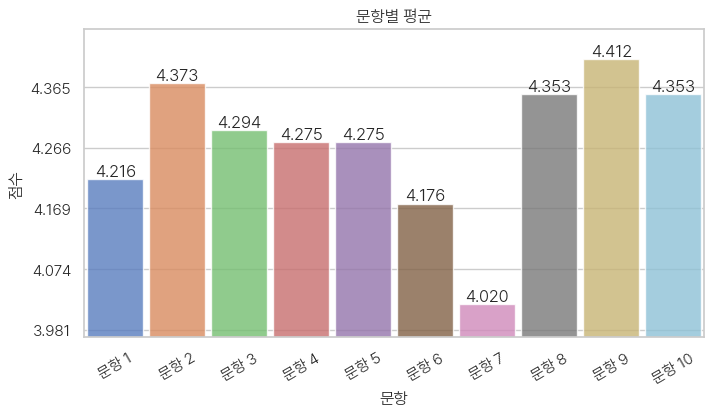

In [322]:
fig,ax=plt.subplots(figsize=figsize)
ax=sns.barplot(byQuestion,x="index",y="scoreLog10",ax=ax,alpha=.8,width=.9)

ax.set_title("문항별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)],rotation=30)
ax.set_ylabel("점수")
ax.set_ylim(np.log10(byQuestion.score.min()-.05),np.log10(byQuestion.score.max()+.05))
ax.set_yticklabels([f"{10**q:.3f}" for q in ax.get_yticks()])

for container in ax.containers:
    ax.bar_label(container,labels=[f"{q:.3f}" for q in byQuestion.score])

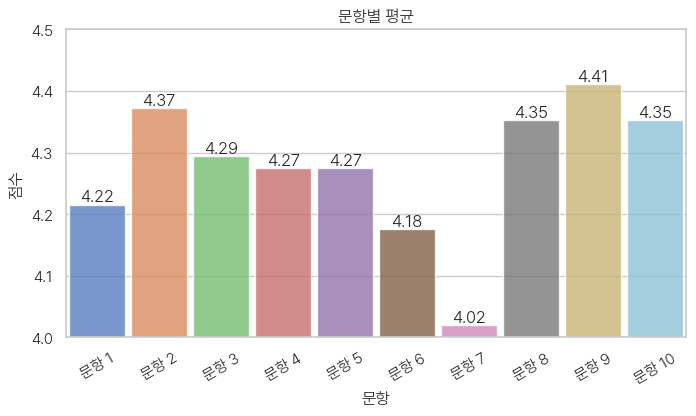

In [323]:
fig,ax=plt.subplots(figsize=figsize)
ax=sns.barplot(byQuestion,x="index",y="score",ax=ax,alpha=.8,width=.9)

ax.set_title("문항별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)],rotation=30)
ax.set_ylabel("점수")
ax.set_ylim(4.0,4.5)

for container in ax.containers:
    ax.bar_label(container,labels=[f"{q:.2f}" for q in byQuestion.score])

In [105]:
## 과목별 mean agg
byClass=maanzock.melt("trainingClass",scoreCols)

,trainingClass,variable,value
0,성인간호학실습2,q1,4
1,성인간호학실습2,q1,4
2,성인간호학실습2,q1,4
3,성인간호학실습2,q1,4
4,성인간호학실습2,q1,4
...,...,...,...
505,아동간호학실습,q10,4
506,아동간호학실습,q10,5
507,지역사회간호학실습,q10,4
508,지역사회간호학실습,q10,5


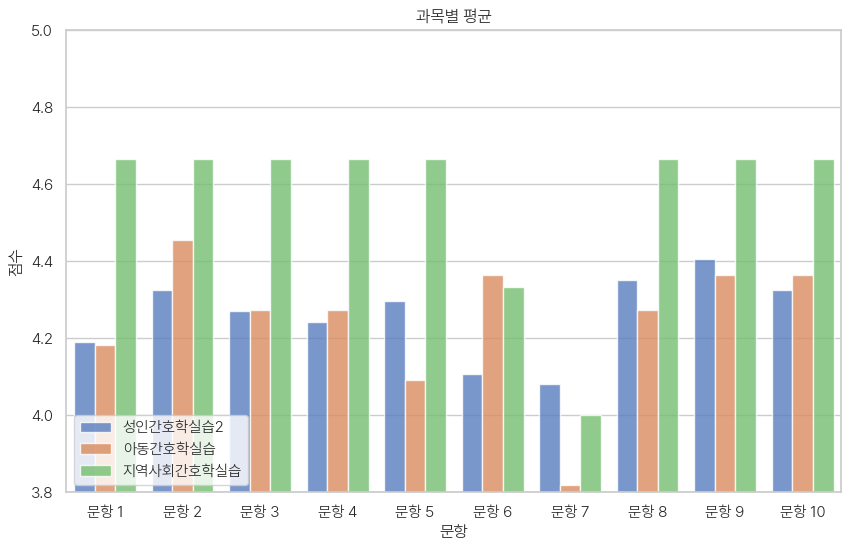

In [317]:
## byClass
fig,ax=plt.subplots(figsize=figsize)
ax=sns.barplot(byClass,hue="trainingClass",x="variable",y="value",ax=ax,alpha=.8,width=.8,errorbar=None)
ax.set_title("과목별 평균")
ax.set_xlabel("문항")
ax.set_ylabel("점수")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)])
ax.set_ylim(3.8,5)
ax.get_legend().set_title("")
sns.move_legend(
    ax,loc="lower left"
)

In [186]:
byCompany=maanzock.melt("trainingCompany",scoreCols)
byCompany

,trainingCompany,variable,value
0,순천향대학교 구미병원,q1,4
1,한림대학교 한강성심병원,q1,4
2,순천향대학교 구미병원,q1,4
3,대전을지대학교병원,q1,4
4,대전을지대학교병원,q1,4
...,...,...,...
505,산본제일병원,q10,4
506,센트럴병원,q10,5
507,문경시보건소,q10,4
508,상주시보건소,q10,5


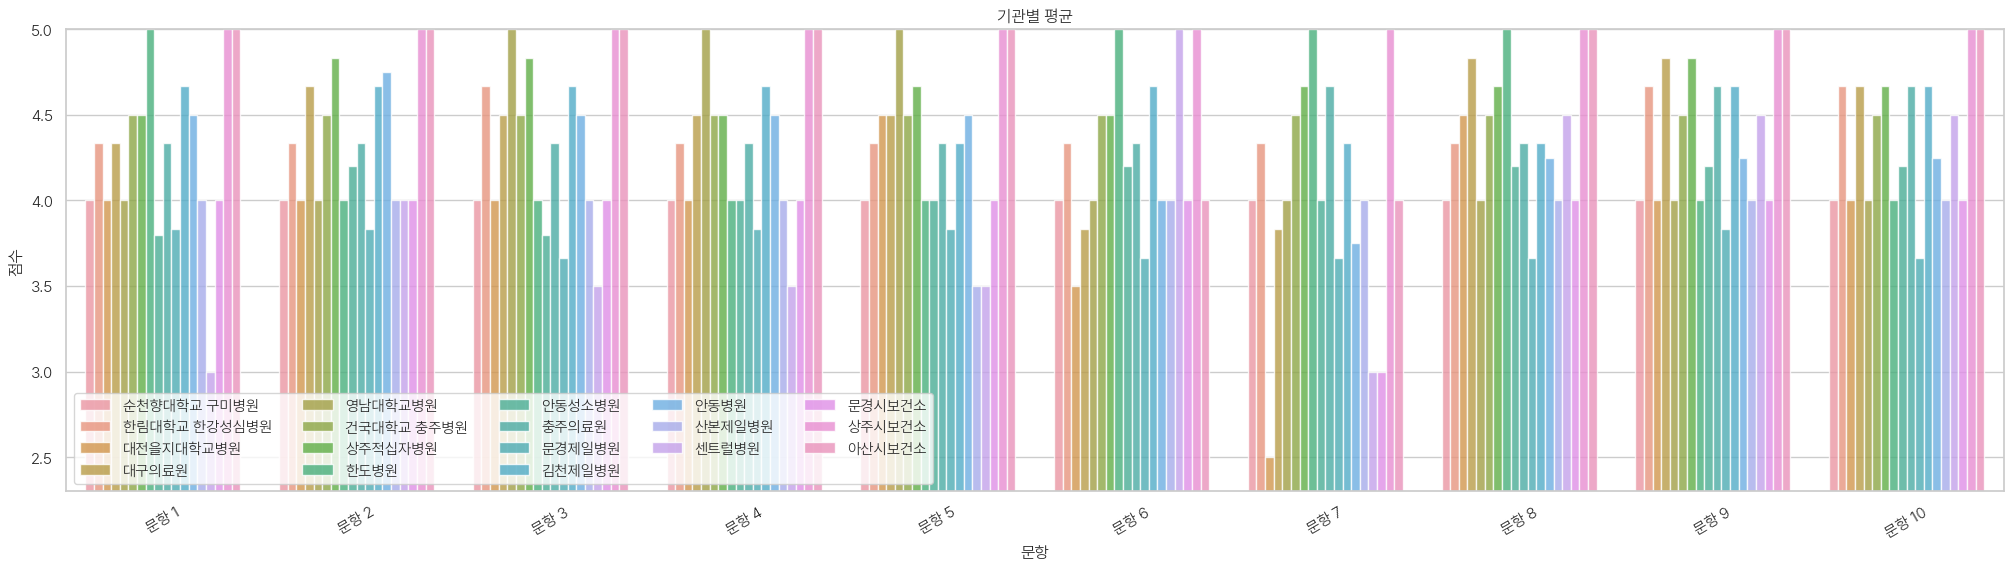

In [216]:
fig,ax=plt.subplots(figsize=(26,6))
ax=sns.barplot(
    byCompany,x="variable",y="value",hue="trainingCompany",
    ax=ax,
    errorbar=None,alpha=.8,)
ax.set_title("기관별 평균")
ax.set_xlabel("문항"),ax.set_ylabel("점수")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)])
ax.set_ylim(2.3,5)
sns.move_legend(
    ax,
    title=None,
    loc="lower left",
    ncol=5,
)

In [293]:
def _expStrToNum(e):
    f=int(e[:e.find("년")]) if isinstance(e,str) else e
    return f

trLeaderExp=maanzock.trainingLeaderExperience.map(_expStrToNum)
maanzock["trainingLeaderExperience"]=trLeaderExp.fillna(trLeaderExp.mean()).astype(int)

trLeaderExpBins=pd.cut(maanzock.trainingLeaderExperience,4)
q=pd.cut(maanzock.trainingLeaderExperience,4,labels=[f"{w.left:.0f}-{w.right:.0f}" for w in trLeaderExpBins.unique()])
maanzock["expCat"]=q
byExp=maanzock.melt("expCat",scoreCols)

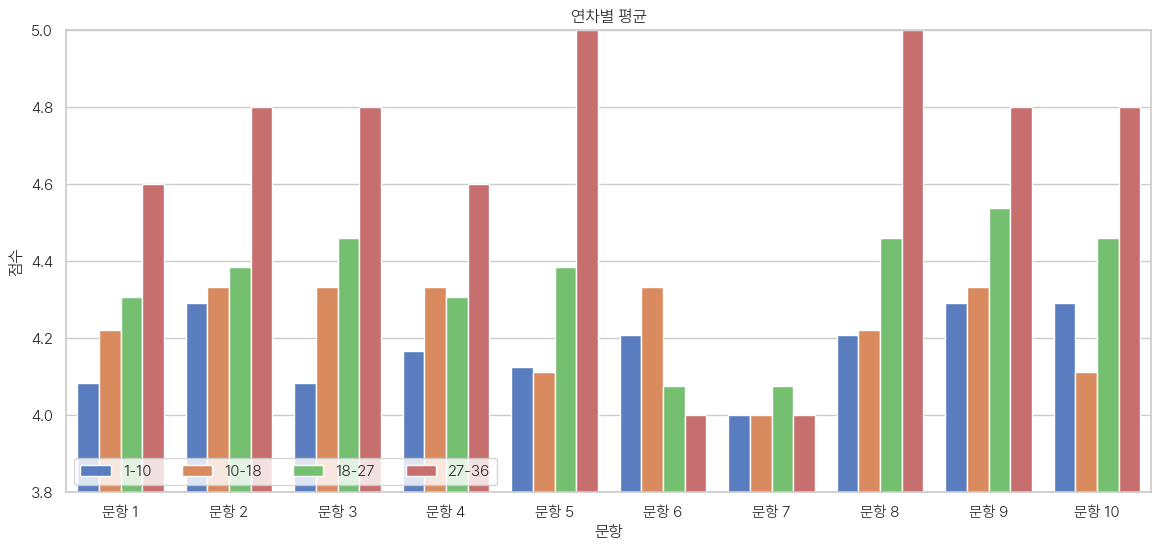

In [324]:
fig,ax=plt.subplots(figsize=(14,6))
sns.barplot(
    byExp,x="variable",y="value",hue="expCat",
    width=.8,
    errorbar=None,
    ax=ax,
    order=[f"q{q}" for q in range(1,11)],
    hue_order=["1-10","10-18","18-27","27-36"]
)

ax.set_title("연차별 평균")
ax.set_xlabel("문항")
ax.set_xticklabels([f"문항 {q}" for q in range(1,11)])
ax.set_ylim(3.8,5)
ax.set_ylabel("점수")
sns.move_legend(
    ax,
    title="",
    loc="lower left",
    ncol=4
)